## File conversion

In [4]:
import os
import subprocess as sp

def convert_files(src_path, src_format, tgt_path, tgt_format):
    files = [''.join(f.split('.')[:-1]) for f in os.listdir(src_path) \
                                     if f.endswith(src_format)]
    for f in files:
        sp.call(['ffmpeg', '-i', os.path.join(src_path, f + src_format),
                 os.path.join(tgt_path, f + tgt_format)])

In [5]:
convert_files('_data/mp4/Sopranos', '.mp4', '_data/wav/Sopranos', '.wav')

## Explore audio

In [6]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set()
np.set_printoptions(precision=8)
np.set_printoptions(suppress=True)

In [51]:
def plot_time_series(file_path):
    data, sampling_rate = librosa.load(file_path)
    plt.figure(figsize=(15,4))
    librosa.display.waveplot(data, sr=sampling_rate)

In [52]:
def get_mfccs(file_path, n_mfcc=20):
    data, sampling_rate = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=n_mfcc)
    plt.figure(figsize=(15, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    return mfccs

In [48]:
src_path = '_data/wav/KS'
tgt_path = '_data/wav/Sopranos'

In [49]:
src_file = os.path.join(src_path, [f for f in os.listdir(src_path) if 'Rolling' in f][0])
tgt_file = os.path.join(tgt_path, [f for f in os.listdir(tgt_path) if 'Rolling' in f][0])

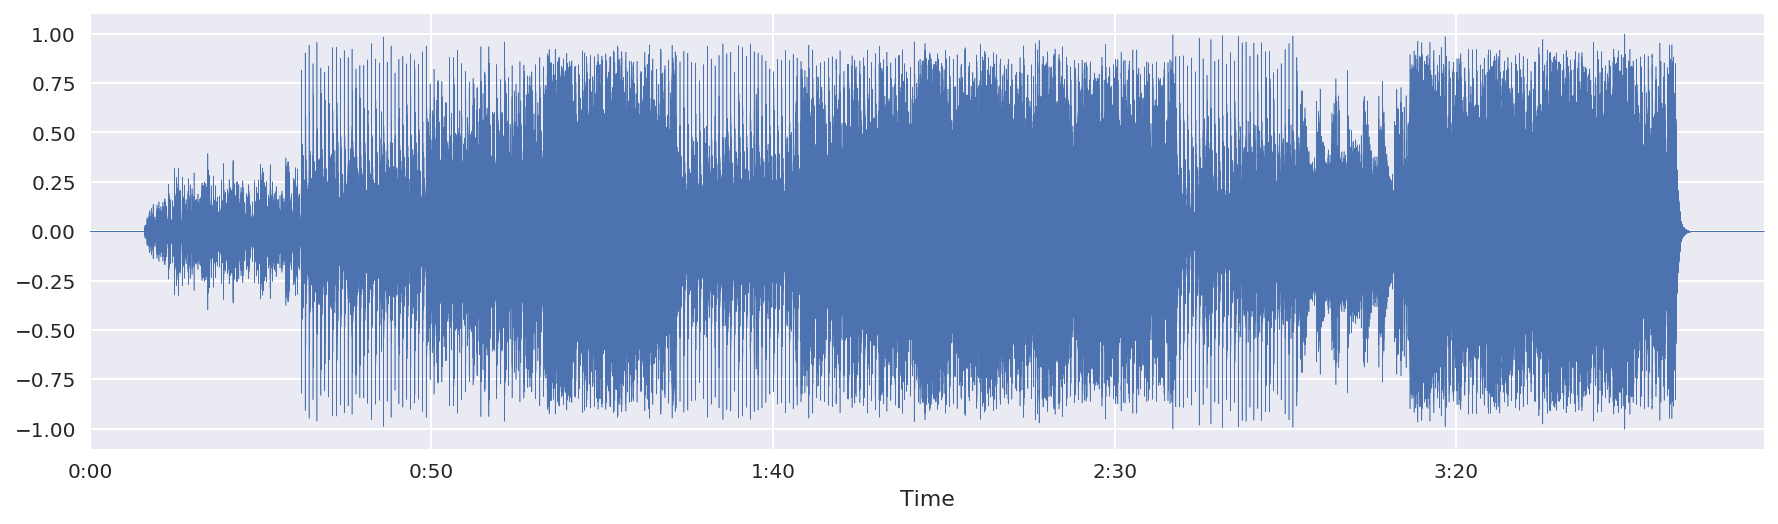

In [53]:
plot_time_series(src_file)

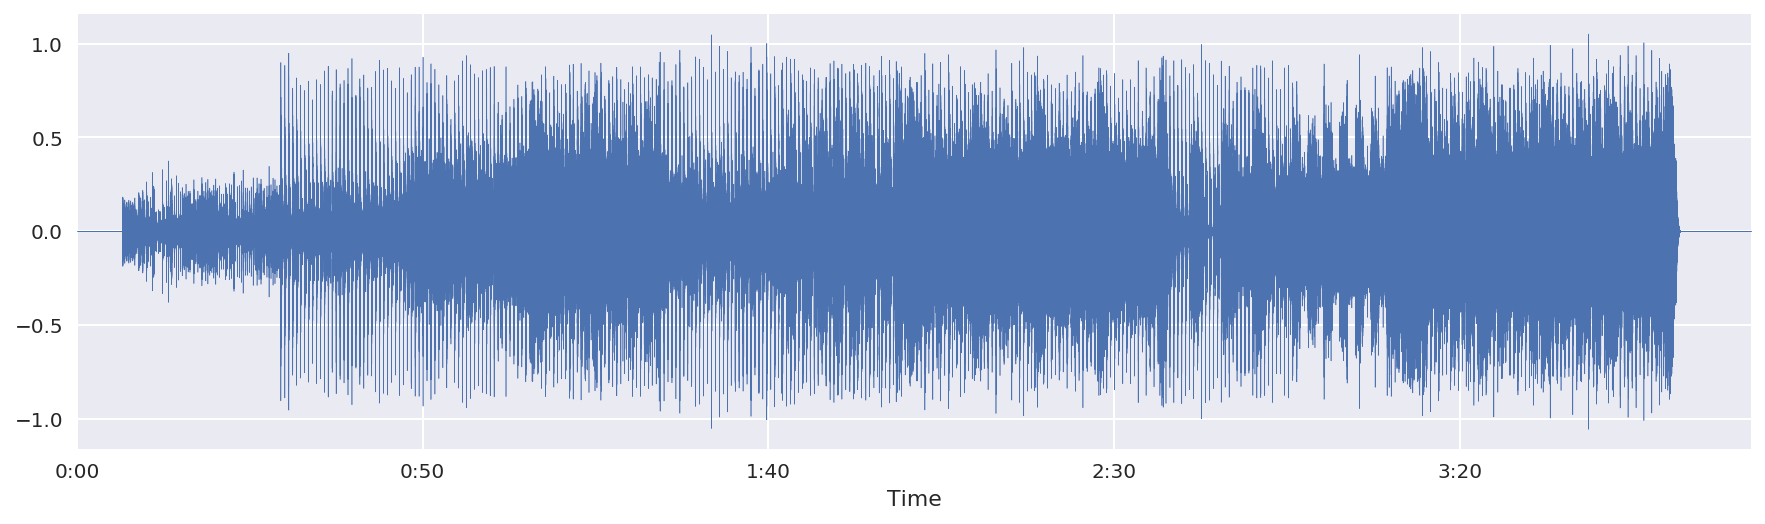

In [54]:
plot_time_series(tgt_file)

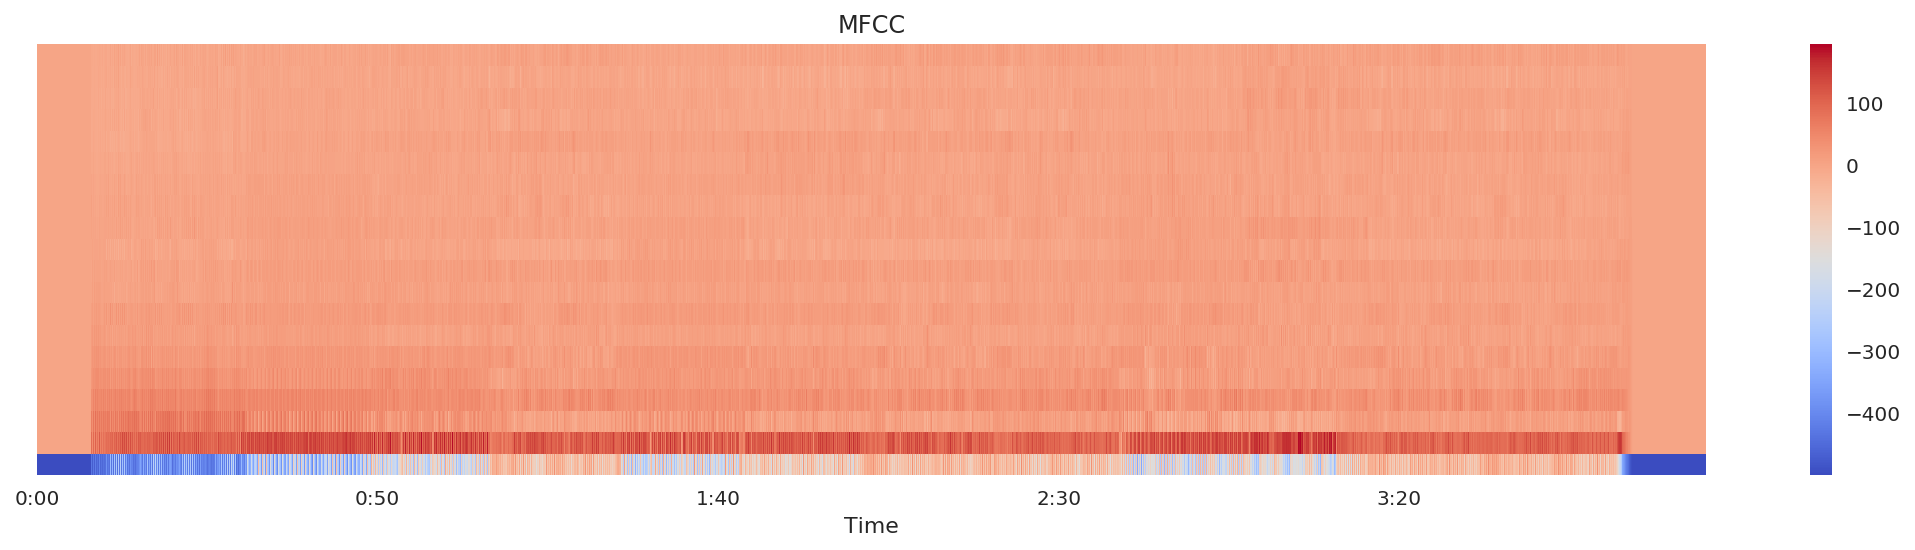

In [55]:
src_mfccs = get_mfccs(src_file)

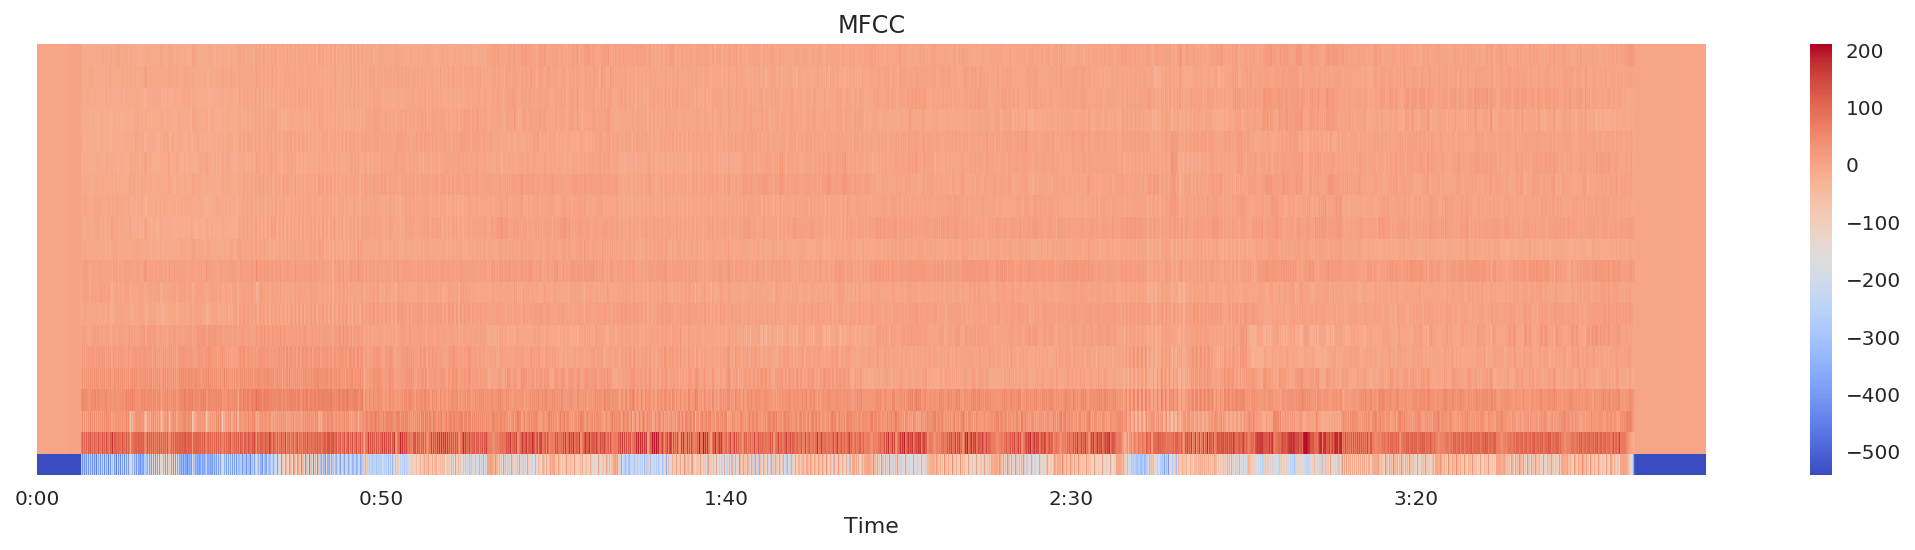

In [56]:
tgt_mfccs = get_mfccs(tgt_file)

In [37]:
src_mfccs

array([-165.1904822 ,  101.31143074,   16.71032431,   34.13747389,
         18.32771314,   14.9999553 ,    6.19642853,   12.03914954,
          4.99385059,    9.56919681,   -0.40703247,    5.11909468,
          2.00441786,    3.06411398,    1.01525261,    4.73355073,
         -1.44966794,    0.85784199,   -2.64151061,    2.50800005])

In [38]:
tgt_mfccs

array([-161.0897132 ,   89.78311061,   23.74576125,   31.39426431,
          9.53533153,    5.44241961,    2.60532389,    5.54287291,
          0.32181646,   11.0515538 ,   -3.10980206,    4.30557924,
         -0.42805311,    2.27135061,   -0.62336178,    0.33757481,
         -2.76371709,    0.72937652,   -0.94067164,    0.15620777])

In [57]:
src_file_2 = os.path.join(src_path, [f for f in os.listdir(src_path) if 'Just' in f][0])
tgt_file_2 = os.path.join(tgt_path, [f for f in os.listdir(tgt_path) if 'Just' in f][0])

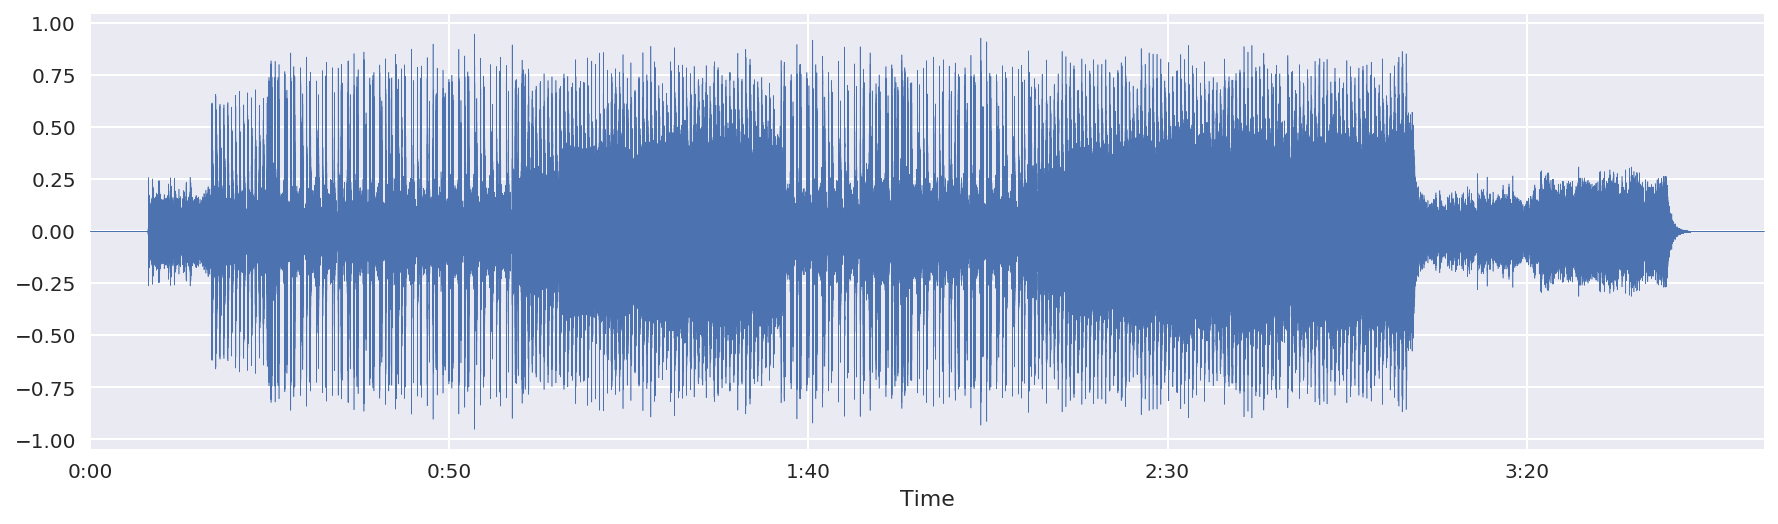

In [58]:
plot_time_series(src_file_2)

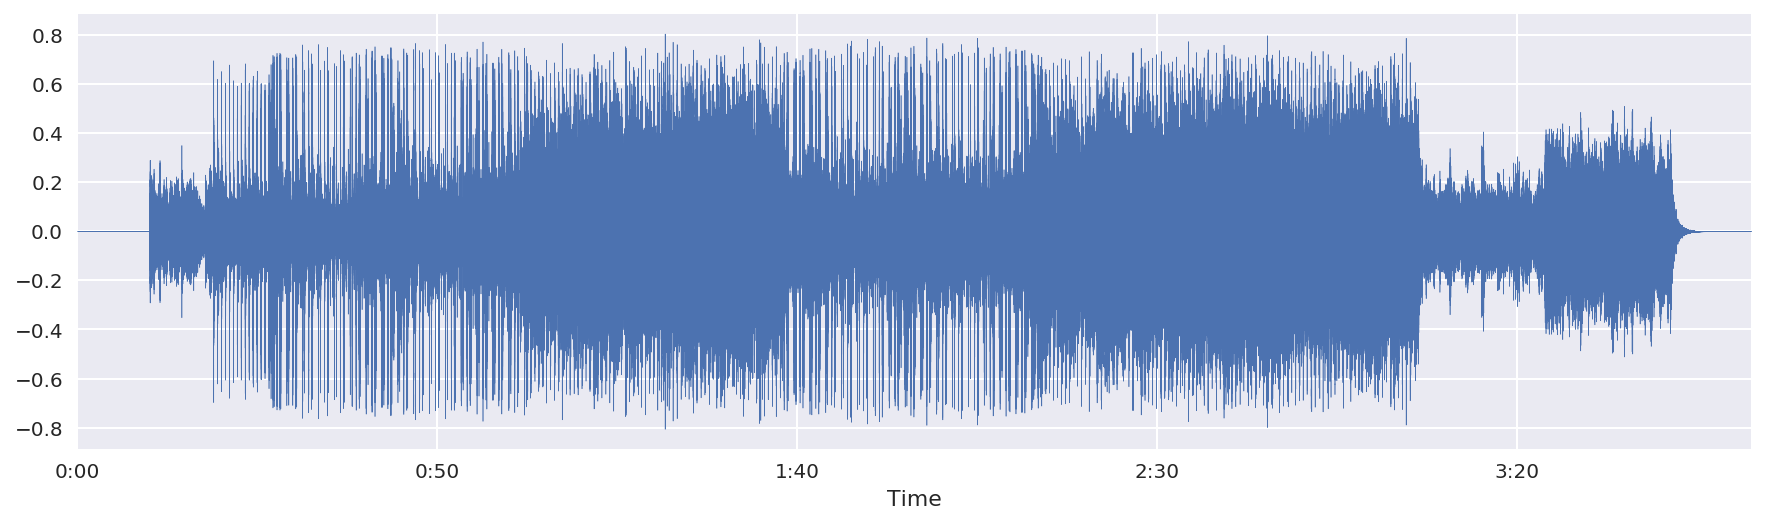

In [59]:
plot_time_series(tgt_file_2)

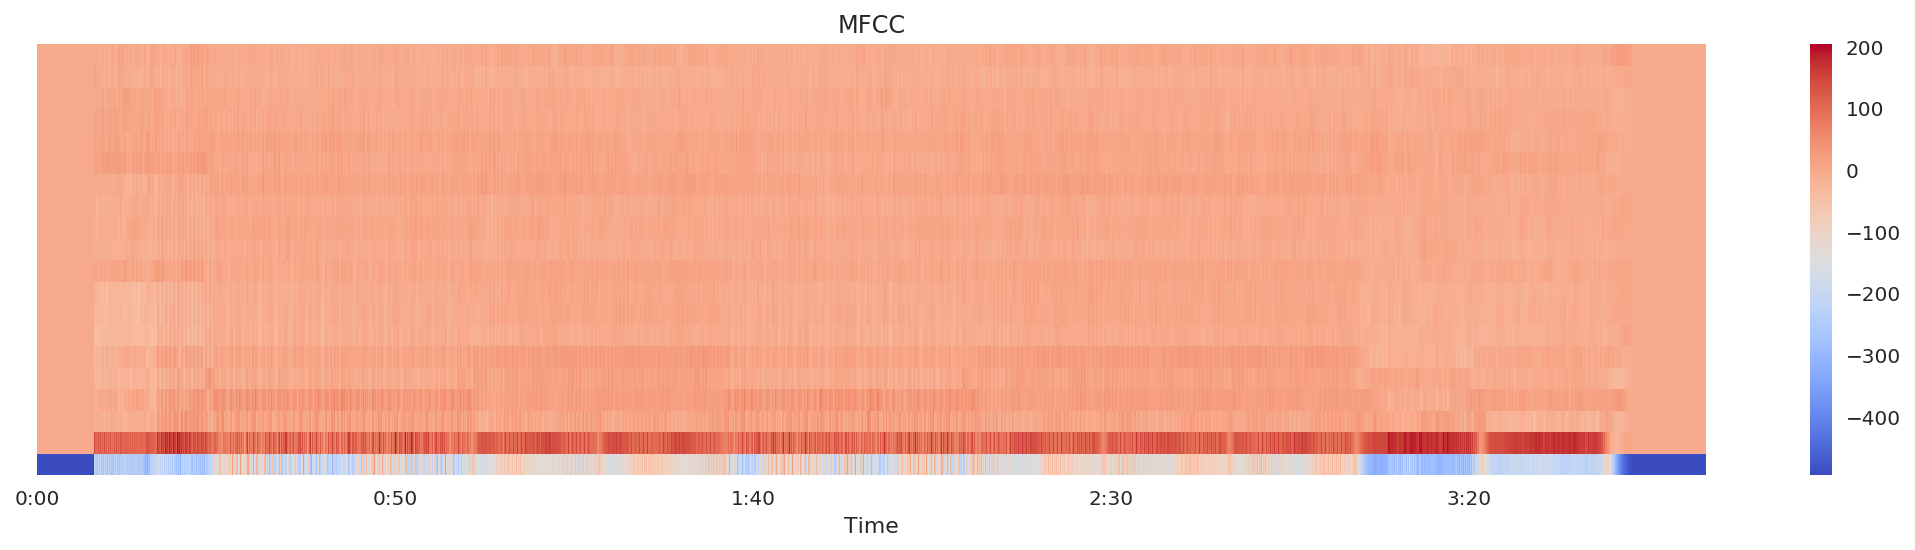

In [61]:
src_mfccs_2 = get_mfccs(src_file_2)

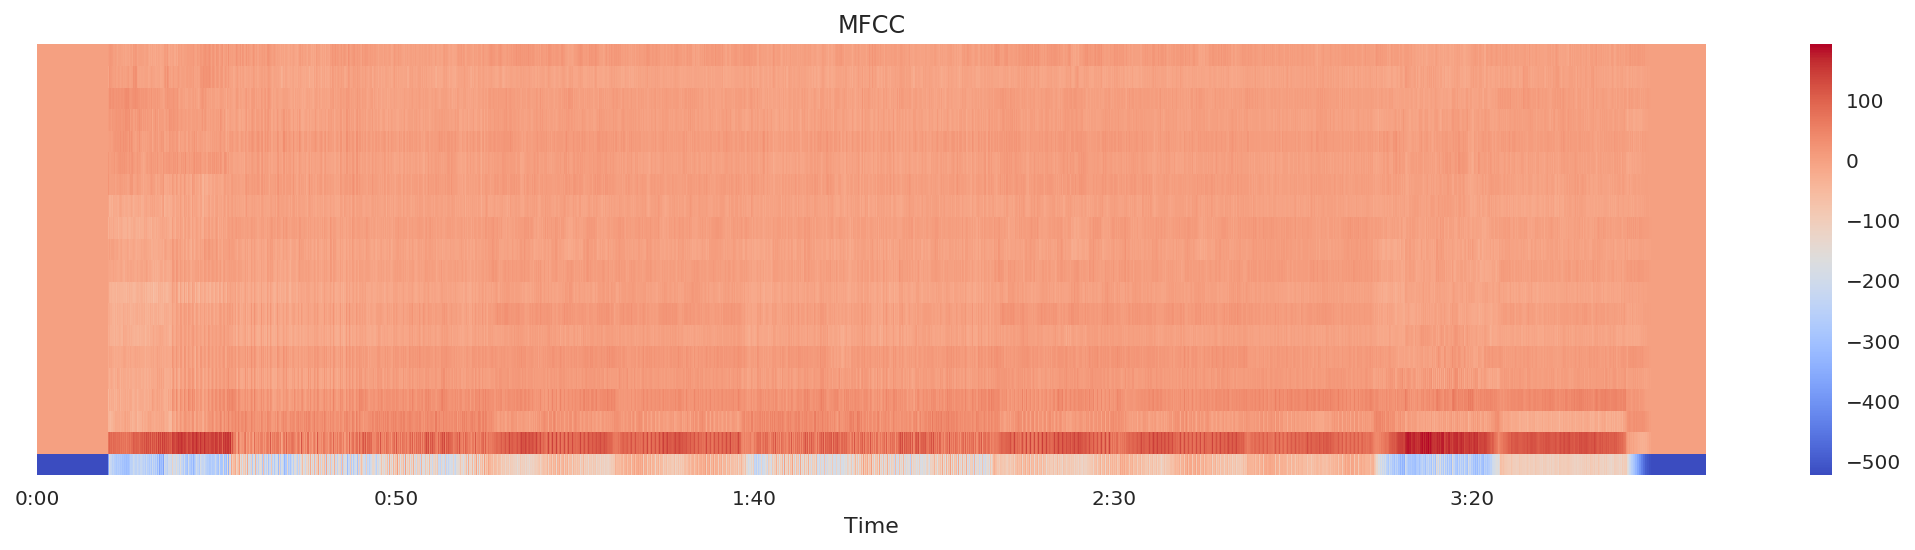

In [62]:
tgt_mfccs_2 = get_mfccs(tgt_file_2)

In [12]:
src_mfccs_2

array([-178.88103129,  106.03822711,    7.20586024,   18.42021326,
          3.81099672,   10.08384567,   -5.38049148,   -1.65775492,
         -1.5552659 ,    5.03252425,   -1.66070358,    3.08586753,
         -0.07740751,    7.94943195,    5.40302114,    6.83812957,
          1.57899497,    0.51152604,   -5.24104461,   -0.17153948])

In [13]:
tgt_mfccs_2

array([-157.56268111,   83.77823349,   12.43239722,   23.36242908,
          4.25368094,    8.38027992,   -5.53155074,    2.37807634,
         -7.28760559,    1.02608886,   -3.5368759 ,    1.06560138,
         -4.48976422,    2.46372146,    0.54438926,    6.38869319,
          0.07639941,    1.32675819,   -5.77620725,    3.65085048])

In [112]:
df = pd.read_csv('_data/matrix.csv', sep='\t')

In [120]:
df = df.set_index('Q/R')

In [124]:
1 - df.round(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Q/R,,,,,,,,,,,,,,,,,,
1,1.00,0.09,0.03,0.10,0.06,0.19,0.15,0.09,0.10,0.13,0.15,0.17,0.09,0.11,0.10,0.14,0.05,0.30
2,0.09,1.00,0.09,0.07,0.22,0.37,0.14,0.10,0.25,0.10,0.11,0.16,0.49,0.19,0.13,0.24,0.05,0.18
3,0.03,0.09,1.00,0.07,0.14,0.06,0.08,0.10,0.08,0.12,0.08,0.11,0.09,0.18,0.15,0.06,0.22,0.08
4,0.10,0.07,0.07,1.00,0.20,0.13,0.22,0.42,0.15,0.20,0.19,0.14,0.07,0.18,0.19,0.15,0.16,0.19
5,0.06,0.22,0.14,0.20,1.00,0.28,0.10,0.17,0.28,0.17,0.18,0.16,0.11,0.15,0.21,0.24,0.36,0.17
6,0.19,0.37,0.06,0.13,0.28,1.00,0.19,0.16,0.37,0.17,0.14,0.27,0.30,0.25,0.20,0.40,0.05,0.37
7,0.15,0.14,0.08,0.22,0.10,0.19,1.00,0.14,0.28,0.10,0.11,0.32,0.13,0.15,0.17,0.22,0.07,0.19
8,0.09,0.10,0.10,0.42,0.17,0.16,0.14,1.00,0.13,0.20,0.26,0.24,0.10,0.87,0.21,0.16,0.17,0.14
9,0.10,0.25,0.08,0.15,0.28,0.37,0.28,0.13,1.00,0.14,0.17,0.23,0.22,0.16,0.18,0.33,0.07,0.30


In [ ]:
!musly -N
!musly -a wav/Sopranos
!musly -a wav/KS
!musly -l
!musly -m matrix2.txt

In [143]:
labels = '''1	wav/Sopranos/80061 - Rolling In The Deep.wav
2	wav/Sopranos/81636 - Just The Way You Are.wav
3	wav/Sopranos/82706 - A Ésa.wav
4	wav/Sopranos/83125 - Atrévete Te Te.wav
5	wav/Sopranos/84459 - El Triste.wav
6	wav/Sopranos/86539 - Perdóname.wav
7	wav/Sopranos/86564 - Persiana Americana.wav
8	wav/Sopranos/86775 - Que Levante La Mano.wav
9	wav/Sopranos/88202 - Ya Lo Pasado Pasado.wav
10	wav/KS/1068 - Atrévete Te Te.wav
11	wav/KS/1106 - Perdóname.wav
12	wav/KS/277 - Persiana Americana.wav
13	wav/KS/555 - Just The Way You Are.wav
14	wav/KS/587 - Que Levante La Mano.wav
15	wav/KS/615 - El Triste.wav
16	wav/KS/620 - Ya lo Pasado Pasado.wav
17	wav/KS/657 - A Ésa.wav
18	wav/KS/787 - Rolling In The Deep.wav'''

In [144]:
labels = {int(line.split('\t')[0]): line.split('\t')[1] for line in labels.split('\n')}

In [145]:
labels

{1: 'wav/Sopranos/80061 - Rolling In The Deep.wav',
 2: 'wav/Sopranos/81636 - Just The Way You Are.wav',
 3: 'wav/Sopranos/82706 - A Ésa.wav',
 4: 'wav/Sopranos/83125 - Atrévete Te Te.wav',
 5: 'wav/Sopranos/84459 - El Triste.wav',
 6: 'wav/Sopranos/86539 - Perdóname.wav',
 7: 'wav/Sopranos/86564 - Persiana Americana.wav',
 8: 'wav/Sopranos/86775 - Que Levante La Mano.wav',
 9: 'wav/Sopranos/88202 - Ya Lo Pasado Pasado.wav',
 10: 'wav/KS/1068 - Atrévete Te Te.wav',
 11: 'wav/KS/1106 - Perdóname.wav',
 12: 'wav/KS/277 - Persiana Americana.wav',
 13: 'wav/KS/555 - Just The Way You Are.wav',
 14: 'wav/KS/587 - Que Levante La Mano.wav',
 15: 'wav/KS/615 - El Triste.wav',
 16: 'wav/KS/620 - Ya lo Pasado Pasado.wav',
 17: 'wav/KS/657 - A Ésa.wav',
 18: 'wav/KS/787 - Rolling In The Deep.wav'}

In [149]:
mat = df.values
results = []
for i, row in enumerate(mat):
    row[i] = 1
    results.append([labels[i + 1].split('-')[1], labels[np.argmax(1 - row) + 1].split('-')[1]])

In [151]:
results = pd.DataFrame(results, columns=['Sopranos', 'KS'])
results['same'] = results['Sopranos'] == results['KS']

In [152]:
pd.DataFrame(results)

,Sopranos,KS,same
0,Rolling In The Deep.wav,Rolling In The Deep.wav,True
1,Just The Way You Are.wav,Just The Way You Are.wav,True
2,A Ésa.wav,A Ésa.wav,True
3,Atrévete Te Te.wav,Que Levante La Mano.wav,False
4,El Triste.wav,A Ésa.wav,False
5,Perdóname.wav,Ya lo Pasado Pasado.wav,False
6,Persiana Americana.wav,Persiana Americana.wav,True
7,Que Levante La Mano.wav,Que Levante La Mano.wav,True
8,Ya Lo Pasado Pasado.wav,Perdóname.wav,False
9,Atrévete Te Te.wav,El Triste.wav,False


In [154]:
sum(results['same'].apply(lambda x: int(x))) / results.shape[0]

0.4444444444444444

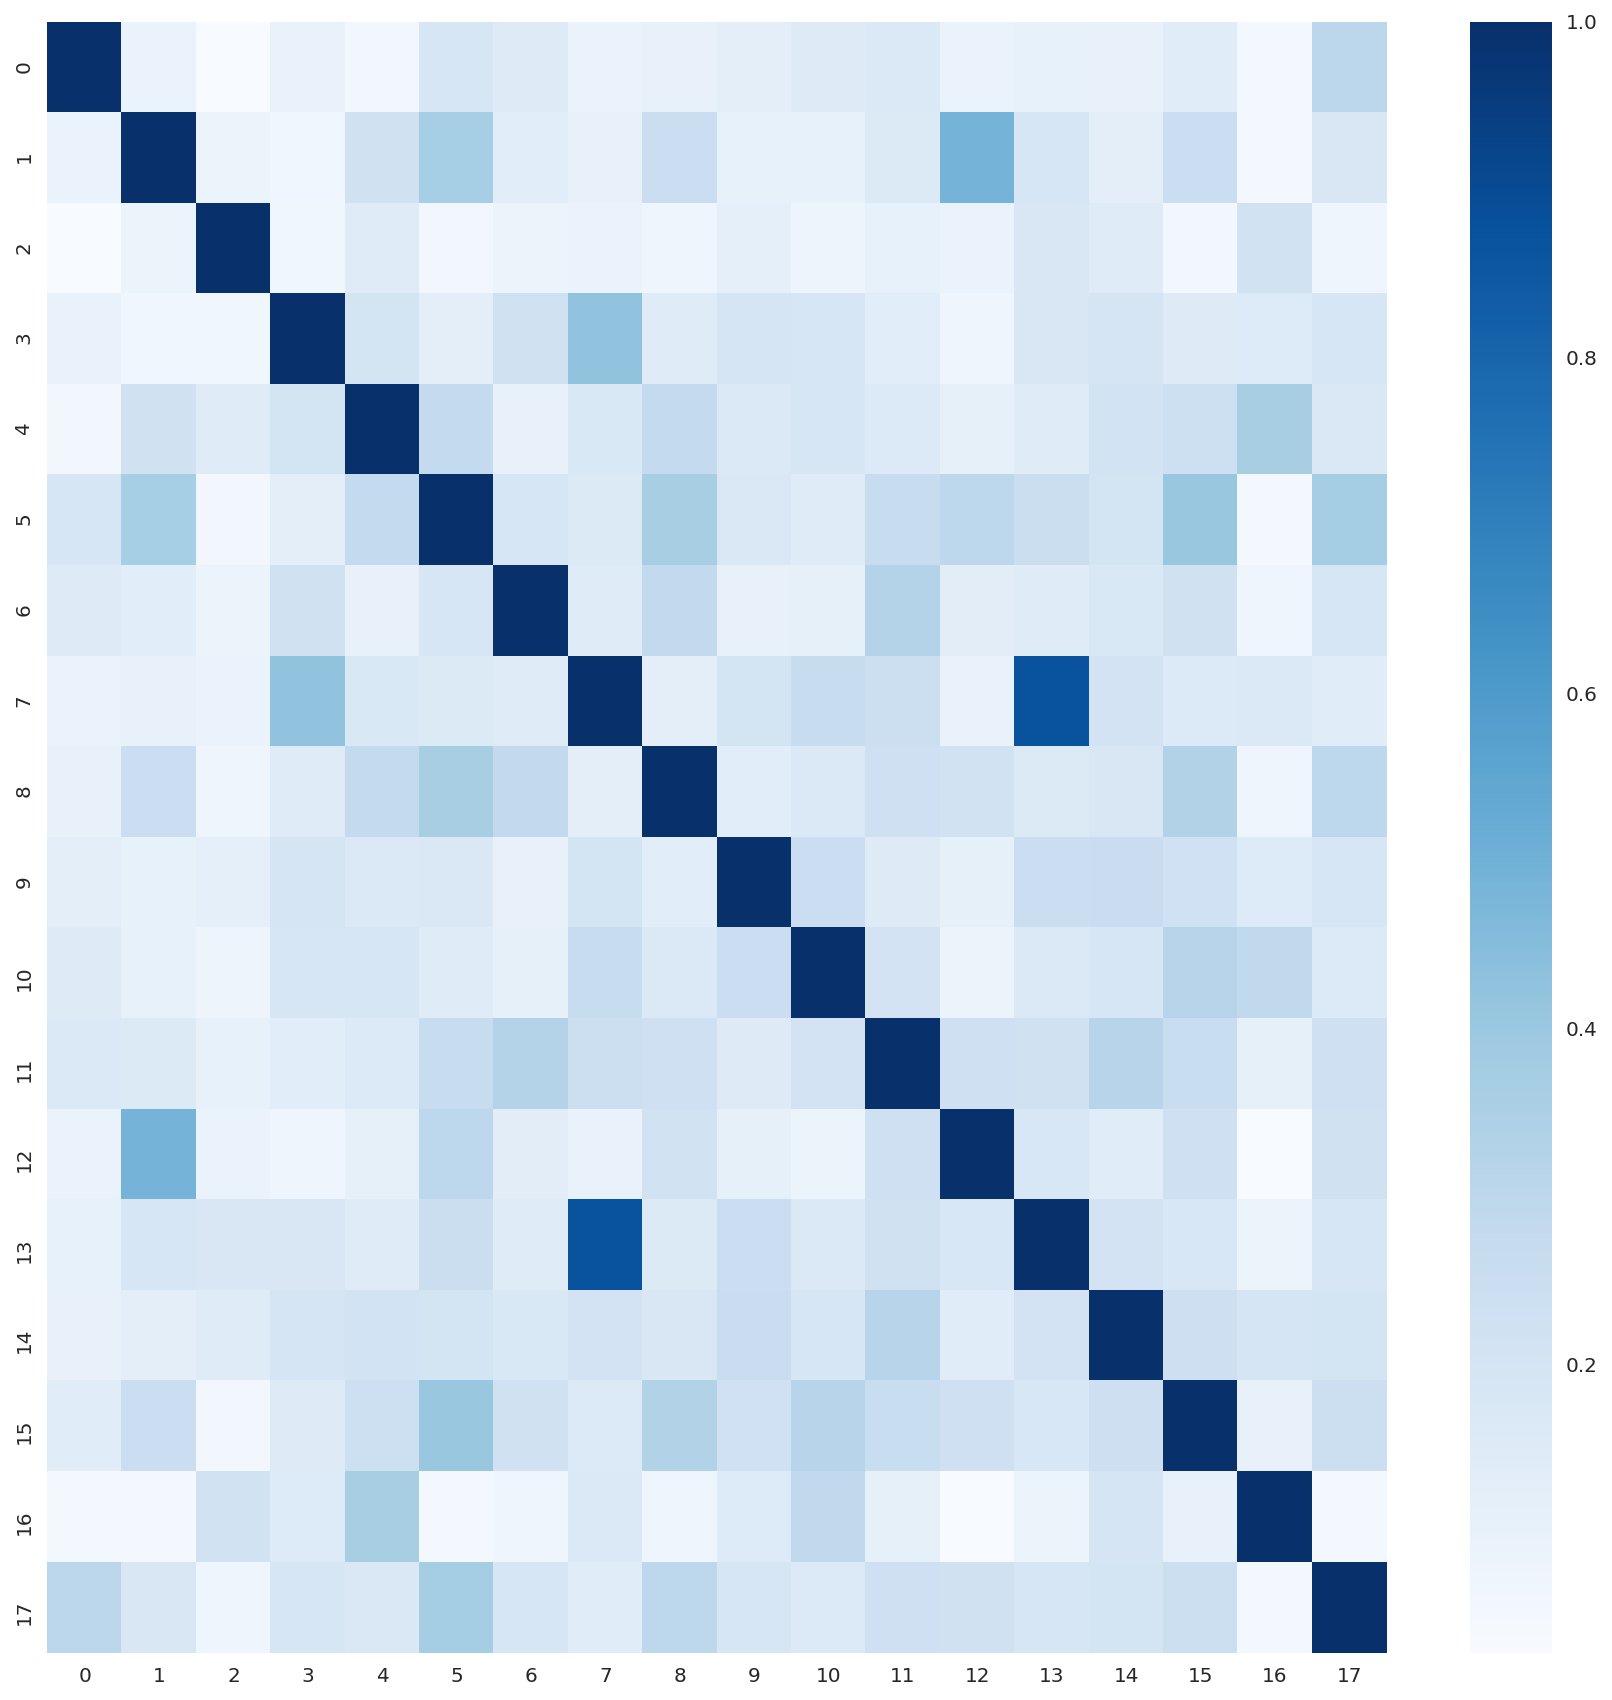

In [122]:
plt.figure(figsize=(15, 15))
sns.heatmap(1 - df.values, cmap='Blues')

In [15]:
from scipy import spatial
def cosine_distance(vector1, vector2):
    return 1 - spatial.distance.cosine(vector1, vector2)

In [16]:
from numpy import dot
from numpy.linalg import norm

def cosine_distance_2(a, b):
    return dot(a, b)/(norm(a)*norm(b))

In [43]:
vectors = [src_mfccs, tgt_mfccs, src_mfccs_2, tgt_mfccs_2]

In [45]:
spatial.distance_matrix(vectors, vectors)

array([[ 0.        , 22.38761406, 35.32654356, 35.80505252],
       [22.38761406,  0.        , 37.20715395, 24.92745371],
       [35.32654356, 37.20715395,  0.        , 34.18819715],
       [35.80505252, 24.92745371, 34.18819715,  0.        ]])

In [69]:
tgt_mfccs_2.shape, src_mfccs_2.shape, src_mfccs.shape, tgt_mfccs.shape

((20, 10015), (20, 10036), (20, 10553), (20, 10428))

In [99]:
from minepy import MINE

def print_stats(mine):
    print("MIC", mine.mic())
    print("GMIC", mine.gmic())

In [79]:
src_mfccs.mean(axis=1)

array([-165.1904822 ,  101.31143074,   16.71032431,   34.13747389,
         18.32771314,   14.9999553 ,    6.19642853,   12.03914954,
          4.99385059,    9.56919681,   -0.40703247,    5.11909468,
          2.00441786,    3.06411398,    1.01525261,    4.73355073,
         -1.44966794,    0.85784199,   -2.64151061,    2.50800005])

In [100]:
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(src_mfccs[1][:10000], tgt_mfccs[1][:10000])
print_stats(mine)

MIC 0.1598991038365598
GMIC 0.13889430445738415


In [101]:
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(src_mfccs_2[1][:10000], tgt_mfccs_2[1][:10000])
print_stats(mine)

MIC 0.3376519954580804
GMIC 0.32596153171601056


In [102]:
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(src_mfccs[1][:10000], src_mfccs_2[1][:10000])
print_stats(mine)

MIC 0.16644090170780854
GMIC 0.1545098410601126


In [103]:
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(tgt_mfccs[1][:10000], tgt_mfccs_2[1][:10000])
print_stats(mine)

MIC 0.13420509589164445
GMIC 0.12061283192835098


In [86]:
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(src_mfccs[5][:10000], tgt_mfccs_2[5][:10000])
print_stats(mine)

MIC 0.10515422191239686
MAS 0.04155129480372263
MEV 0.09475316890788754
MCN (eps=0) 7.924812503605781
MCN (eps=1-MIC) 2.584962500721156
GMIC 0.09519366282706854
TIC 63.05745321884084


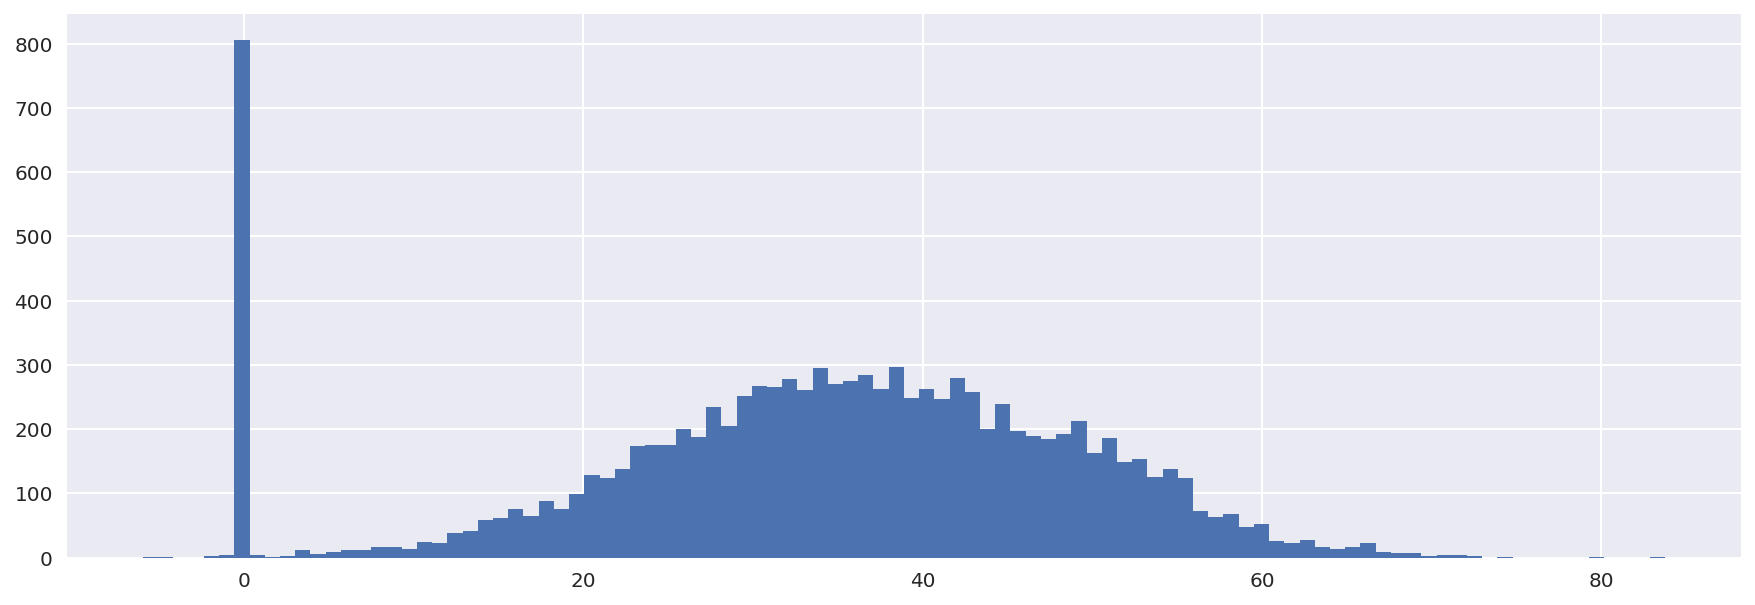

In [108]:
pd.Series(src_mfccs[3]).hist(bins=100, figsize=(15,5))

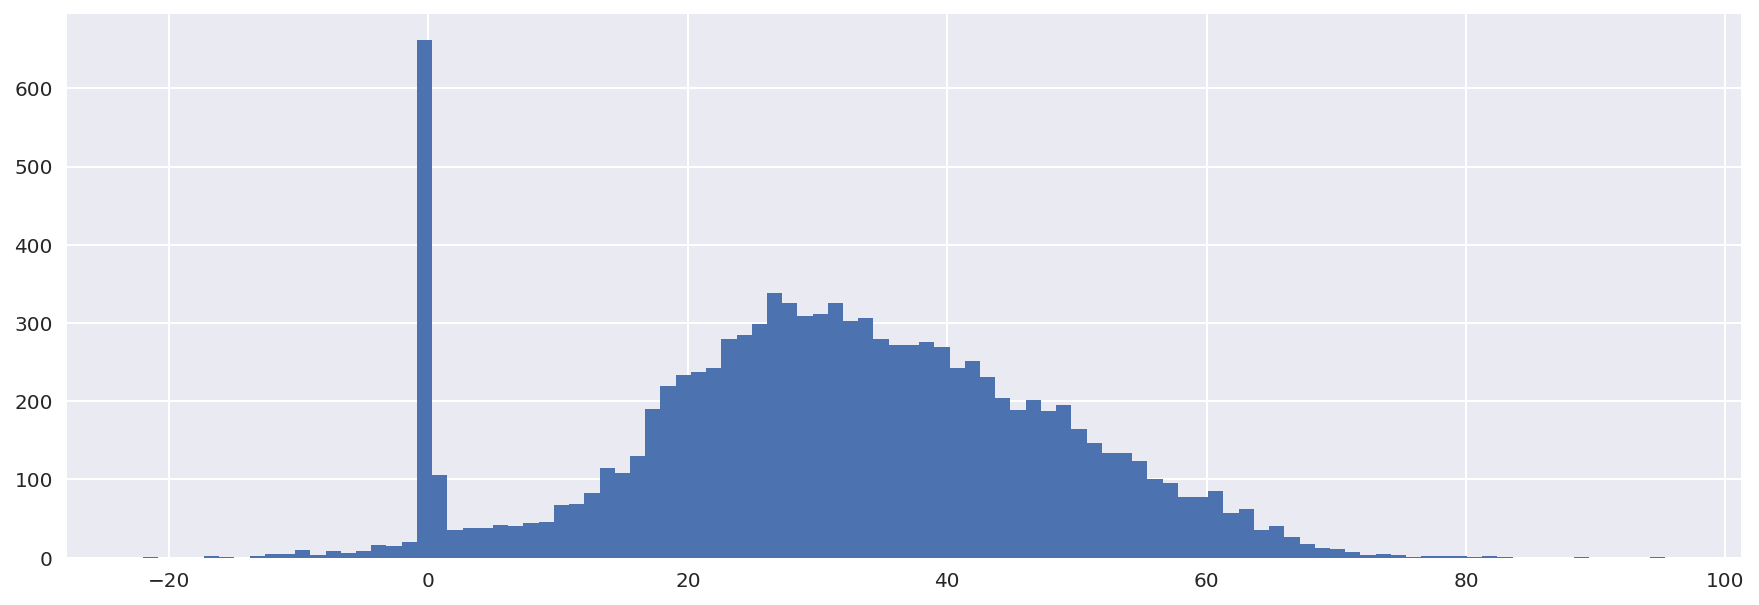

In [109]:
pd.Series(tgt_mfccs[3]).hist(bins=100, figsize=(15,5))

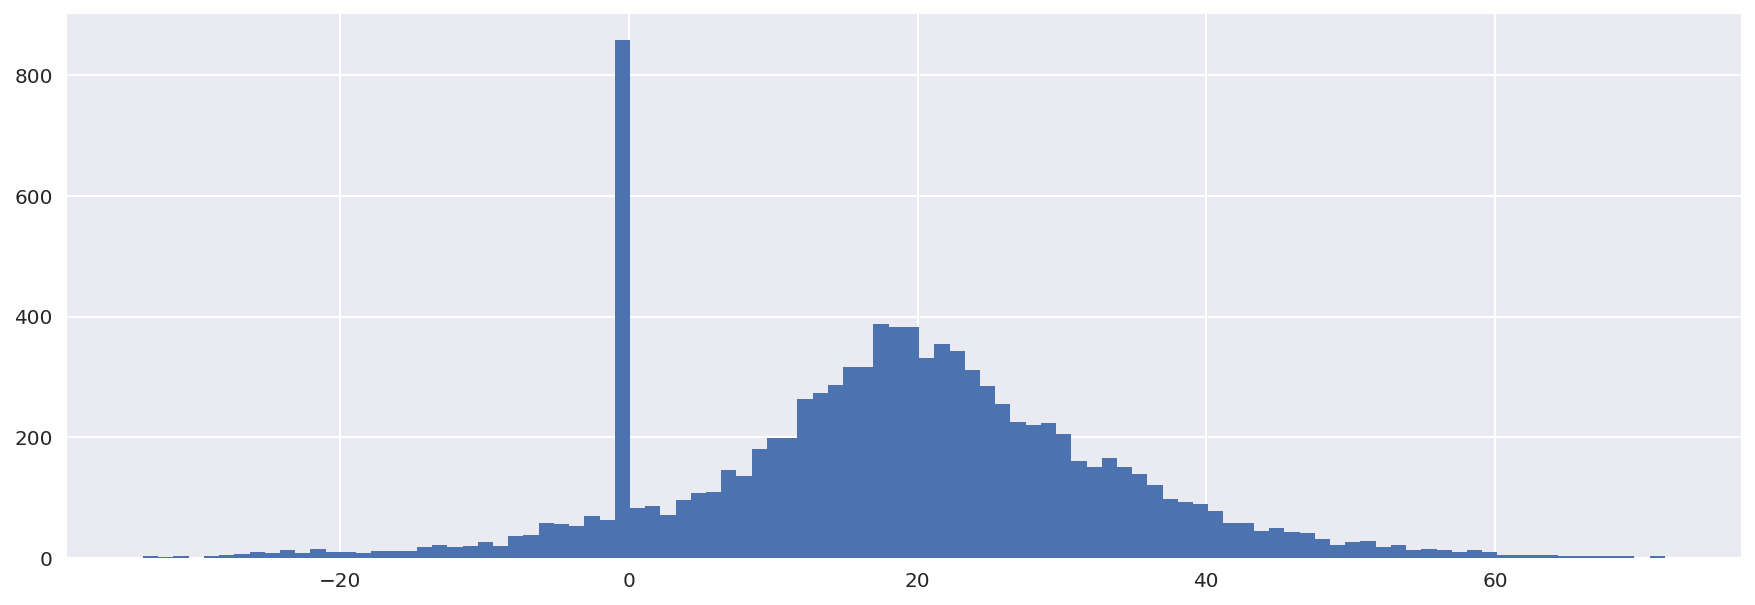

In [110]:
pd.Series(src_mfccs_2[3]).hist(bins=100, figsize=(15,5))

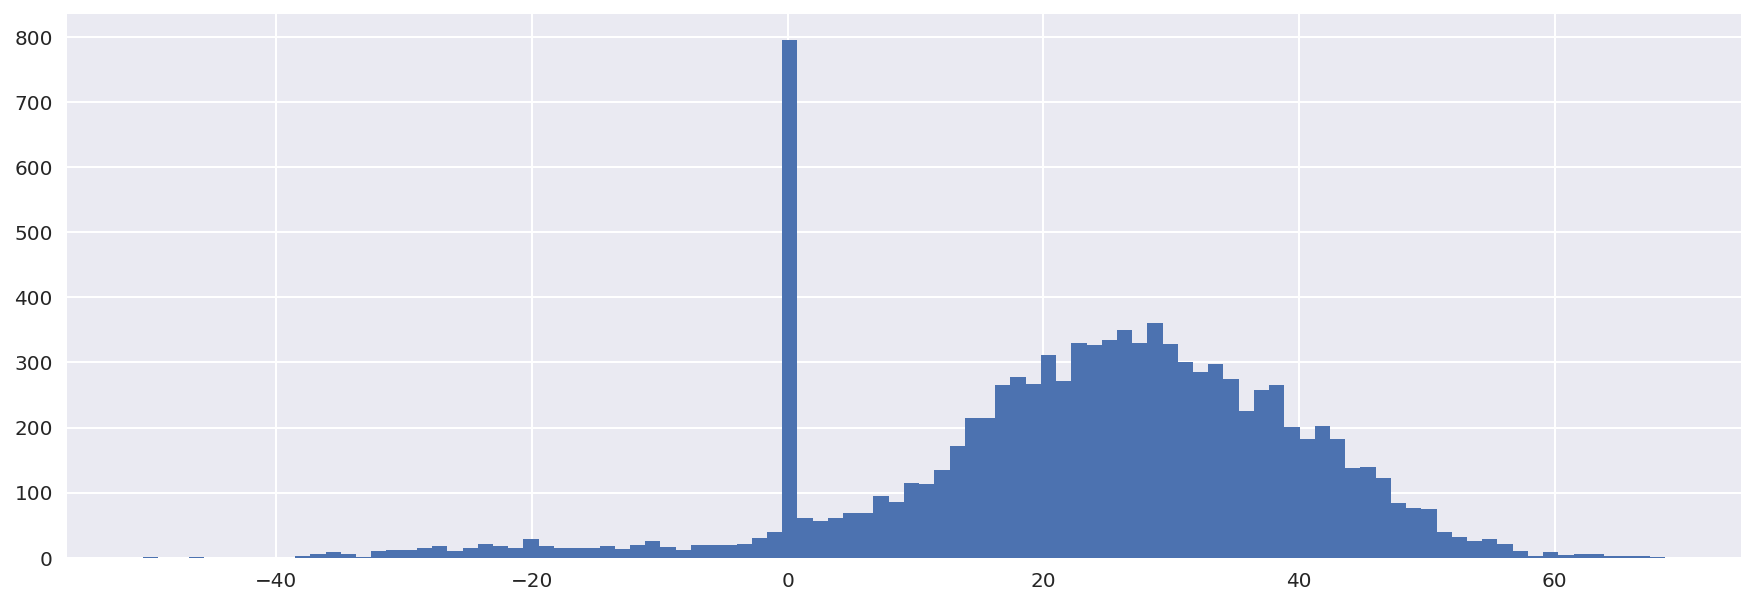

In [111]:
pd.Series(tgt_mfccs_2[3]).hist(bins=100, figsize=(15,5))

In [39]:
cosine_distance(src_mfccs_2, tgt_mfccs_2)

0.9952993898781038

In [40]:
cosine_distance_2(src_mfccs, tgt_mfccs)

0.9948117538707667

In [41]:
cosine_distance(src_mfccs, src_mfccs_2)

0.9862820522429794

In [42]:
cosine_distance(tgt_mfccs, tgt_mfccs_2)

0.9919245588729955

In [ ]:
cosine_distance(tgt_mfccs, tgt_mfccs_2)